In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import xarray as xr
from datetime import datetime
style.use('fivethirtyeight')

In [2]:
rainfall_df = pd.read_csv("data/imagerdata.csv", header=None, names=["day", "hour", "minute", "rainfall_rate"])
# Initial Testing for NaN values.
rainfall_df.dropna(inplace=True)
print(rainfall_df.head())

   day  hour  minute  rainfall_rate
0    1     0       0              0
1    1     0       1              0
2    1     0       2              0
3    1     0       3              0
4    1     0       4              0


In [3]:
# Parsing the Dates
rainfall_df['date']=pd.to_datetime(rainfall_df['day'], unit='D', origin=pd.Timestamp('2009-12-31')) # Using day number to create the date
rainfall_df['timestamp'] = rainfall_df['date'] + pd.to_timedelta(rainfall_df['hour'].astype('str') + ':' + rainfall_df['minute'].astype('str') + ':00') # append the timedelta in hours and minutes to get the full timestamp
rainfall_df.set_index('timestamp', inplace=True)

## Calculate the daily rainfall rate.

For this Group-By is to be used for grouping together based on the day for each month.

In [4]:
daily_groups = rainfall_df.groupby(pd.Grouper(freq="M"))

In [11]:
jan_data = daily_groups.get_group(pd.Timestamp('2010-01-31', freq='M'))
jan_data['total_rate'] = jan_data['rainfall_rate'].sum()

/Users/dhirajsaharia/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Precip Dataset

In [6]:
precip_dataset = xr.open_dataset('data/chirps-2010.nc') # open the dataset using xarray
precip_df = precip_dataset['precip'].sel(time=slice('2010-01-01T00:0','2010-01-31T00:0'), longitude=103.67499, latitude=1.324997).to_dataframe()

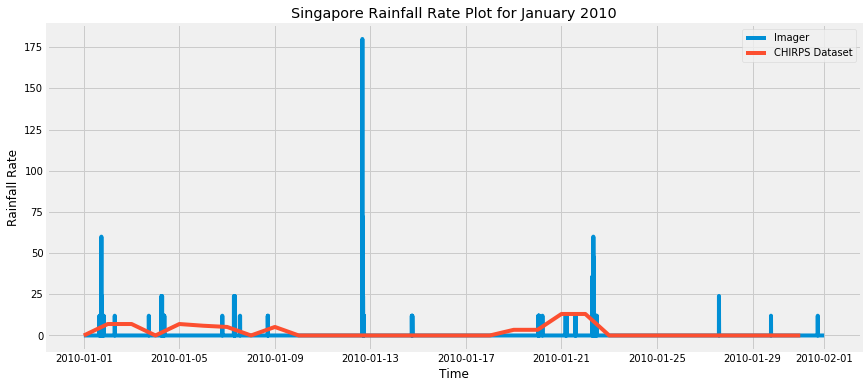

In [17]:
plt.rcParams["figure.figsize"] = (13,6) # For Increasing Size of graph
plt.plot(jan_data['rainfall_rate'], label='Imager')
plt.plot(precip_df['precip'], label='CHIRPS Dataset')
plt.title('Singapore Rainfall Rate Plot for January 2010')
plt.xlabel('Time')
plt.ylabel('Rainfall Rate')
plt.legend()